In [1]:
import json
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import gensim.downloader as api
import gensim
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.manifold import TSNE
import pandas as pd
import sqlite3
import warnings
warnings.filterwarnings("ignore")
conn = sqlite3.connect("project.db")
import itertools
import pickle
from scipy.stats import entropy
import operator
import random
# RUN ALL THE CODE BEFORE YOU START
import numpy as np
from matplotlib.pylab import plt #load plot library
# indicate the output of plotting function is printed to the notebook
%matplotlib inline 
import re
from numpy import nan
import pickle

In [3]:
regex = re.compile('[^a-zA-Z]')

In [4]:
def unpickle_list(pickled_list):
    with open(pickled_list, 'rb') as f:
        unpickled_list = pickle.load(f)
    return unpickled_list

In [1]:
depressed_tweets = unpickle_list('7year_all_depression_tweets.pkl')
print(len(depressed_tweets))

In [7]:
healthy_tweets = unpickle_list('healthy_tweets_4.pkl')
print(len(healthy_tweets))

8325030


In [8]:
depressed_embed = Word2Vec.load('7year_all_depression_tweets.bin')
print(depressed_embed)

Word2Vec(vocab=125300, size=300, alpha=0.025)


In [5]:
healthy_embed = Word2Vec.load('healthy_tweets_4.bin')
print(healthy_embed)

Word2Vec(vocab=488225, size=300, alpha=0.025)


In [ ]:
info = api.info()
pretrained_model = api.load("glove-twitter-200")
print(pretrained_model)

# Incremental Word Embeddings 

In [5]:
depressed_embed_2012 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2012.txt')
depressed_embed_2013 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2013.txt')
depressed_embed_2014 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2014.txt')
depressed_embed_2015 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2015.txt')
depressed_embed_2016 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2016.txt')
depressed_embed_2017 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2017.txt')
depressed_embed_2018 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2018.txt')
depressed_embed_2019 = KeyedVectors.load_word2vec_format('incremental_depress_tweets_2019.txt')

In [6]:
def display_closestwords_tsnescatterplot(model, word, dim):
    arr = np.empty((0,dim), dtype='f')
    word_labels = [word]
    word_num = 20 
    spec_col = "#f4415e"
    norm_col = "#41c4f4"
    
    colors=[norm_col] * (word_num+1)
    colors[0] = spec_col

    # get close words
    close_words = model.similar_by_word(word, word_num)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)

    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    #tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    #new_values = tsne_model.fit_transform(tokens)
    
    
    tsne = TSNE(perplexity=5,n_components=2, init='pca', n_iter=1500,  random_state=32)
    #np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)


    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    # display scatter plot
    #plt.scatter(x_coords, y_coords)
    
    plt.figure(figsize=(10, 10)) 

    plt.scatter(x_coords, y_coords, color=colors)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, 
                     xy=(x, y), 
                     xytext=(5, 2), 
                     textcoords='offset points')
        plt.xlim(-1000, 1000)
        plt.ylim(-1000, 1000)
#     plt.xlim(x_coords.min() - 10, x_coords.max()+10)
#     plt.ylim(y_coords.min()- 10, y_coords.max()+10)
    plt.show()


In [ ]:
def word_similarity(word, model1, model2, model3, topwords=20):
    result1 = model1.wv.similar_by_word(word, topwords)
    result2 = model2.wv.similar_by_word(word, topwords)
    result3 = model3.wv.similar_by_word(word, topwords)

    width = 20
    print("word: ",word,'\n')
    print("{} {} {}".format('depressed'.ljust(40), 'healthy'.ljust(40), 'pretrained'.ljust(width)))
    print("-----------------------------------------------------------------------------------------------------------")
    for i, r in enumerate(result1):
        s1 = regex.sub('', result1[i][0])
        s2 = regex.sub('', result2[i][0])
        s3 = regex.sub('', result3[i][0])
        print("{} {} | {} {} | {} {}".format(
            s1.ljust(width - 5),
            str(round(result1[i][1], 4)).ljust(width),
            s2.ljust(width),
            str(round(result2[i][1], 4)).ljust(width-8),
            s3.ljust(width),
            str(round(result3[i][1],4)).ljust(width - 5)))
    print('\n')

In [ ]:
word_similarity('i', depressed_embed, healthy_embed, depressed_embed, 20)

In [ ]:
word_similarity('antidepressants', depressed_embed, healthy_embed, pretrained_model, 25)

In [ ]:
healthy_embed.most_similar('i', topn=30)

In [ ]:
display_closestwords_tsnescatterplot(depressed_embed, 'sleep')


In [ ]:
display_closestwords_tsnescatterplot(depressed_embed, 'never')
display_closestwords_tsnescatterplot(healthy_embed, 'never')

depressed_embed.most_similar('never')


In [ ]:
display_closestwords_tsnescatterplot(depressed_embed, 'happy')
depressed_embed.most_similar('happy')

In [ ]:
display_closestwords_tsnescatterplot(depressed_embed, 'life')
depressed_embed.most_similar('life')

In [ ]:
display_closestwords_tsnescatterplot(pretrained_model, 'social')

In [ ]:
#print("-----------------------------------------------------------------------------")
sim = healthy_embed.most_similar(positive=['woman', 'king'], negative=['man'], topn=2)
print('women is to man as king is to ' + str(sim))
sim = healthy_embed.most_similar(positive=['paris', 'rome'], negative=['france'], topn=2)
print('paris is to france as rome is to ' + str(sim))
sim = healthy_embed.most_similar(positive=['snow', 'beach'], negative=['skiing'], topn=2)
print('snow is to skiing as beach is to ' + str(sim))
#sim = healthy_embed.most_similar(positive=['dog', 'cat'], negative=['pet'], topn=2)
#print('dog is to pet as cat is to ' + str(sim))
sim = healthy_embed.most_similar(positive=['book', 'tv'], negative=['reading'], topn=2)
print('book is to reading as tv is to ' + str(sim))
#sim = healthy_embed.most_similar(positive=['walk', 'run'], negative=['slow'], topn=2)
#print('walk is to slow as run is to ' + str(sim))
sim = healthy_embed.most_similar(positive=['dress', 'phone'], negative=['clothing'], topn=2)
print('dress is to clothing as phone is to ' + str(sim))
#sim = healthy_embed.most_similar(positive=['life', 'friends'], negative=['fun'], topn=2)
#print('life is to fun as friends is to ' + str(sim))
sim = healthy_embed.most_similar(positive=['big', 'dark'], negative=['bigger'], topn=2)
print('big is to bigger as dark is to ' + str(sim))
#sim = healthy_embed.most_similar(positive=['man', 'woman'], negative=['boss'], topn=5)
#print('man is to programmer as woman is to ' + str(sim))

In [21]:
def word_similarity_year(word, model1, model2, model3, year):
    top_words = 20
    result1 = model1.wv.similar_by_word(word, top_words)
    result2 = model2.wv.similar_by_word(word, top_words)
    result3 = model3.wv.similar_by_word(word, top_words)

    width = 20
    print("word: ",word,'\n')
    print("{} {} {}".format(str(year[0]).ljust(40), str(year[1]).ljust(40), str(year[2]).ljust(width)))
    print("-----------------------------------------------------------------------------------------------------------")
    for i, r in enumerate(result1):
        print("{} {} | {} {} | {} {}".format(
            str(result1[i][0]).ljust(width - 5),
            str(round(result1[i][1], 4)).ljust(width),
            str(result2[i][0]).ljust(width),
            str(round(result2[i][1], 4)).ljust(width-8),
            str(result3[i][0]).ljust(width),
            str(round(result3[i][1],4)).ljust(width - 5)))
    print('\n')

In [10]:
models = [depressed_embed_2012, depressed_embed_2013, depressed_embed_2014, depressed_embed_2015, depressed_embed_2016,
          depressed_embed_2017, depressed_embed_2018, depressed_embed_2019]
years = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

In [11]:
def all_words(word, models):
    top_nwords = 30
    complete_word_list = []
    for model in models:
        similar_word_list = model.wv.similar_by_word(word, top_nwords)
        unzipped = list(zip(*similar_word_list))
        complete_word_list.extend(list(unzipped[0]))
        complete_word_list = list(set(complete_word_list))
    return complete_word_list
    
    

In [12]:
wordlist = all_words('mentalhealth', models)

In [14]:
def pair_wise_similarity(keyword, models, years):
    wordlist = all_words(keyword, models)
    word2year = {word: [] for word in wordlist}
    for model in models:
        for word in wordlist:
            try:
                word2year[word].append(round(model.similarity(keyword, word), 4))
            except:
                #float('nan')
                word2year[word].append(float('nan'))
    return word2year   

In [16]:
word2year = pair_wise_similarity('mentalhealth', models, years)
#word2year

In [17]:
wordss = []
for word in word2year:
    min_dist = np.nanmin(word2year[word]) #min(x for x in word2year[word] if x is not nan) #min(word2year[word])
    max_dist =  np.nanmax(word2year[word]) #max(x for x in word2year[word] if x is not nan)
    diff_dist = max_dist - min_dist
    #print(word, min_dist, max_dist, diff_dist)
    wordss.append((word,  diff_dist))

    #print(word, diff_dist)

In [21]:
def plot_word(keyword, models, years ):
    word2year_dict = pair_wise_similarity(keyword, models, years)
    fig = plt.figure(figsize=(12,7))
    ax=plt.gca() 
    
    #for word in word2year:
    markers=['^','*','o','v','<','D','>','1','2','3','4','8','s','p','P','h','H','+','x','X','D','d','|','_']
    linestyles = ['-', '--', '-.', ':'] * 3
    words = random.sample(list(word2year_dict.keys()), 7)
    for i, word in enumerate(words):
        #[:-1]
        ax.plot(years[:-1], word2year_dict[word][:-1],  linestyle=linestyles[i], marker=markers[i], label='#'+str(word))
    
    font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
    
    
    plt.legend(loc='lower left')
    # Add title and x, y labels

    plt.title(str(keyword), fontdict=font, fontweight='bold')
    plt.xlabel("Years", fontdict=font)
    plt.ylabel("Similarity Score", fontdict=font)

    ax.set_xticklabels(years, rotation='vertical')

    ax.set_ylim([0,None])
    #plt.annotate('friendship', xy=(x[0,2], y[0,2]))
    plt.savefig(keyword+'.png')
    plt.show()


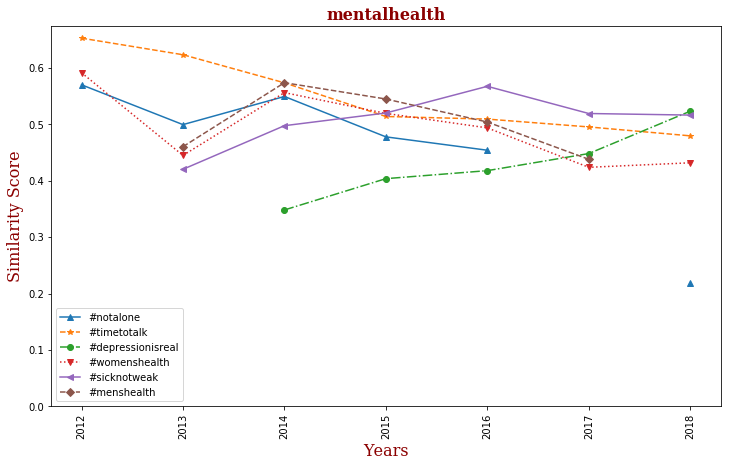

In [23]:
plot_word('mentalhealth', models, years)
#y = line.get_ydata()[-1]


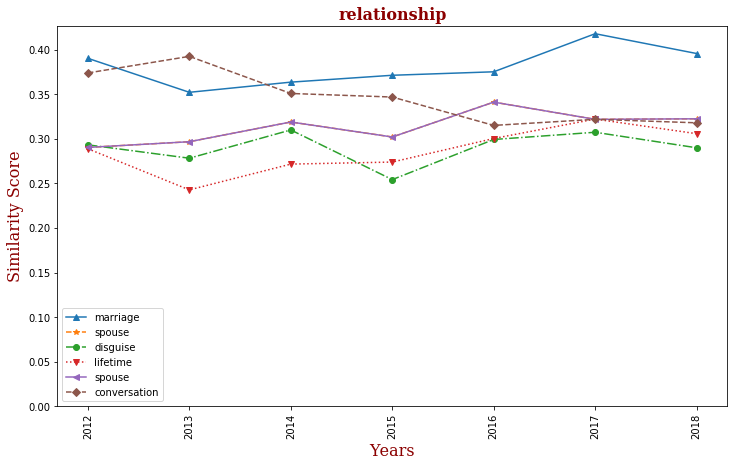

In [138]:
plot_word('relationship', models, years)